In [40]:
import pandas as pd
import numpy as np

import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [41]:
df = pd.read_csv('/home/piai/2. Big Data 분석/Car.csv')
df.head()

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,Maruti Wagon R LXI CNG,Mumbai,2682.68,2010,72000,CNG,Manual,First,26.6 kmpl,998 CC,58.16 bhp,5.0,NaN
1,Hyundai Creta 1.6 CRDi SX Option,Pune,19162.00,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN
2,Honda Jazz V,Chennai,6898.32,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh
3,Maruti Ertiga VDI,Chennai,9197.76,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,27194.71,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Price              6200 non-null   float64
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 736.8+ KB


In [5]:
df.describe()

,Price,Year,Kilometers_Driven,Seats
count,6200.000000,7253.000000,7.253000e+03,7200.000000
mean,14912.514750,2013.365366,5.869906e+04,5.279722
std,17674.318464,3.254421,8.442772e+04,0.811660
min,7.080000,1996.000000,1.710000e+02,0.000000
25%,5365.360000,2011.000000,3.400000e+04,5.000000
50%,8814.520000,2014.000000,5.341600e+04,5.000000
75%,15869.972500,2016.000000,7.300000e+04,5.000000
max,245273.600000,2019.000000,6.500000e+06,10.000000


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [6]:
df.isnull().sum()

Name                    0
Location                0
Price                1053
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
dtype: int64

In [7]:
# 연비 숫자와 단위 분리
df[['Mileage', 'Mileage_Unit']] = df['Mileage'].str.split(expand=True)
df[['Engine', 'Engine_Unit']] = df['Engine'].str.split(expand=True)
df[['Power', 'Power_Unit']] = df['Power'].str.split(expand=True)
# df[['New_Price', 'New_Price_Unit']] = df['New_Price'].str.split(expand=True)

df.head()

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Mileage_Unit,Engine_Unit,Power_Unit
0,Maruti Wagon R LXI CNG,Mumbai,2682.68,2010,72000,CNG,Manual,First,26.6,998,58.16,5.0,NaN,kmpl,CC,bhp
1,Hyundai Creta 1.6 CRDi SX Option,Pune,19162.00,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.0,NaN,kmpl,CC,bhp
2,Honda Jazz V,Chennai,6898.32,2011,46000,Petrol,Manual,First,18.2,1199,88.7,5.0,8.61 Lakh,kmpl,CC,bhp
3,Maruti Ertiga VDI,Chennai,9197.76,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,NaN,kmpl,CC,bhp
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,27194.71,2013,40670,Diesel,Automatic,Second,15.2,1968,140.8,5.0,NaN,kmpl,CC,bhp


In [8]:
# Engine 컬럼의 데이터 중 결측치 제거
df.dropna(subset=['Mileage'],inplace=True)
df.isnull().sum()

Name                    0
Location                0
Price                1053
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                 46
Power                  46
Seats                  53
New_Price            6246
Mileage_Unit            0
Engine_Unit            46
Power_Unit             46
dtype: int64

In [9]:
# Engine과 Power 데이터 결측치 확인
df[df['Engine'].isnull() == True]

# 한 행에 Engine과 Power와 Seats가 모두 nan값인 행이 존재한다.
# 만약 다 따로따로였으면 평균 등으로 대체하여 데이터 손실을 줄이는 방법이 좋았을 것이다.
# 지금은 Seats 컬럼의 결측치만 지워도 Seats 결측치 갯수인 53개만 지울 수 있고 전체 데이터 수의 1%도 안되므로 그냥 Seats 결측치를 제거하겠다

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Mileage_Unit,Engine_Unit,Power_Unit
194,Honda City 1.5 GXI,Ahmedabad,4522.23,2007,60006,Petrol,Manual,First,0.0,NaN,NaN,NaN,NaN,kmpl,NaN,NaN
208,Maruti Swift 1.3 VXi,Kolkata,3234.55,2010,42001,Petrol,Manual,First,16.1,NaN,NaN,NaN,NaN,kmpl,NaN,NaN
733,Maruti Swift 1.3 VXi,Chennai,2682.68,2006,97800,Petrol,Manual,Third,16.1,NaN,NaN,NaN,NaN,kmpl,NaN,NaN
749,Land Rover Range Rover 3.0 D,Mumbai,40623.44,2008,55001,Diesel,Automatic,Second,0.0,NaN,NaN,NaN,NaN,kmpl,NaN,NaN
1294,Honda City 1.3 DX,Delhi,4905.47,2009,55005,Petrol,Manual,First,12.8,NaN,NaN,NaN,NaN,kmpl,NaN,NaN
1327,Maruti Swift 1.3 ZXI,Hyderabad,8891.17,2015,50295,Petrol,Manual,First,16.1,NaN,NaN,NaN,NaN,kmpl,NaN,NaN
1385,Honda City 1.5 GXI,Pune,2299.44,2004,115000,Petrol,Manual,Second,0.0,NaN,NaN,NaN,NaN,kmpl,NaN,NaN
1460,Land Rover Range Rover Sport 2005 2012 Sport,Coimbatore,62667.40,2008,69078,Petrol,Manual,First,0.0,NaN,NaN,NaN,NaN,kmpl,NaN,NaN
2074,Maruti Swift 1.3 LXI,Pune,4828.82,2011,24255,Petrol,Manual,First,16.1,NaN,NaN,NaN,NaN,kmpl,NaN,NaN
2096,Hyundai Santro LP zipPlus,Coimbatore,2958.61,2004,52146,Petrol,Manual,First,0.0,NaN,NaN,NaN,NaN,kmpl,NaN,NaN


In [10]:

df.dropna(subset=['Seats'], inplace=True)
df.isnull().sum()

Name                    0
Location                0
Price                1042
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                  0
Power                   0
Seats                   0
New_Price            6193
Mileage_Unit            0
Engine_Unit             0
Power_Unit              0
dtype: int64

In [11]:
# 분리한 연리,엔진,마력의 데이터타입 변경

df['Mileage'] = df['Mileage'].astype('float64')
df['Engine'] = df['Engine'].astype('int64')
df['Power'] = df['Power'].astype('float64') #문자로 'null'이라는 마력 데이터가 존재하여 실수형으로 바꿀 수 없다.
df.head()

ValueError: could not convert string to float: 'null'

In [12]:
df[df['Power'] == 'null']

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Mileage_Unit,Engine_Unit,Power_Unit
76,Ford Fiesta 1.4 SXi TDCi,Jaipur,3065.92,2008,111111,Diesel,Manual,First,17.80,1399,null,5.0,NaN,kmpl,CC,bhp
79,Hyundai Santro Xing XL,Hyderabad,1992.85,2005,87591,Petrol,Manual,First,0.00,1086,null,5.0,NaN,kmpl,CC,bhp
89,Hyundai Santro Xing XO,Hyderabad,3219.22,2007,73745,Petrol,Manual,First,17.00,1086,null,5.0,NaN,kmpl,CC,bhp
120,Hyundai Santro Xing XL eRLX Euro III,Mumbai,1303.02,2005,102000,Petrol,Manual,Second,17.00,1086,null,5.0,NaN,kmpl,CC,bhp
143,Hyundai Santro Xing XO eRLX Euro II,Kochi,2560.04,2008,80759,Petrol,Manual,Third,17.00,1086,null,5.0,NaN,kmpl,CC,bhp
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6891,Toyota Etios GD,Kolkata,NaN,2013,60000,Diesel,Manual,First,23.59,1364,null,5.0,NaN,kmpl,CC,bhp
6896,Toyota Etios Liva GD,Hyderabad,NaN,2013,86000,Diesel,Manual,First,23.59,1364,null,5.0,NaN,kmpl,CC,bhp
6947,Toyota Etios Liva G,Delhi,NaN,2012,77800,Petrol,Manual,First,18.30,1197,null,5.0,NaN,kmpl,CC,bhp
7092,Hyundai Santro Xing XG AT eRLX Euro III,Coimbatore,NaN,2007,64168,Petrol,Automatic,First,17.00,1086,null,5.0,NaN,kmpl,CC,bhp


In [ ]:
len(df[df['Power'] == 'null'])

125

In [13]:
df['Power'].replace('null', np.nan, inplace=True)
df[df['Power'].isnull() == True]

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Mileage_Unit,Engine_Unit,Power_Unit
76,Ford Fiesta 1.4 SXi TDCi,Jaipur,3065.92,2008,111111,Diesel,Manual,First,17.80,1399,NaN,5.0,NaN,kmpl,CC,bhp
79,Hyundai Santro Xing XL,Hyderabad,1992.85,2005,87591,Petrol,Manual,First,0.00,1086,NaN,5.0,NaN,kmpl,CC,bhp
89,Hyundai Santro Xing XO,Hyderabad,3219.22,2007,73745,Petrol,Manual,First,17.00,1086,NaN,5.0,NaN,kmpl,CC,bhp
120,Hyundai Santro Xing XL eRLX Euro III,Mumbai,1303.02,2005,102000,Petrol,Manual,Second,17.00,1086,NaN,5.0,NaN,kmpl,CC,bhp
143,Hyundai Santro Xing XO eRLX Euro II,Kochi,2560.04,2008,80759,Petrol,Manual,Third,17.00,1086,NaN,5.0,NaN,kmpl,CC,bhp
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6891,Toyota Etios GD,Kolkata,NaN,2013,60000,Diesel,Manual,First,23.59,1364,NaN,5.0,NaN,kmpl,CC,bhp
6896,Toyota Etios Liva GD,Hyderabad,NaN,2013,86000,Diesel,Manual,First,23.59,1364,NaN,5.0,NaN,kmpl,CC,bhp
6947,Toyota Etios Liva G,Delhi,NaN,2012,77800,Petrol,Manual,First,18.30,1197,NaN,5.0,NaN,kmpl,CC,bhp
7092,Hyundai Santro Xing XG AT eRLX Euro III,Coimbatore,NaN,2007,64168,Petrol,Automatic,First,17.00,1086,NaN,5.0,NaN,kmpl,CC,bhp


In [14]:
df.isnull().sum()

Name                    0
Location                0
Price                1042
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                  0
Power                 125
Seats                   0
New_Price            6193
Mileage_Unit            0
Engine_Unit             0
Power_Unit              0
dtype: int64

In [15]:
df.dropna(subset=['Power'], inplace=True)
df.isnull().sum()

Name                    0
Location                0
Price                1020
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                  0
Power                   0
Seats                   0
New_Price            6068
Mileage_Unit            0
Engine_Unit             0
Power_Unit              0
dtype: int64

In [16]:
# 분리한 연리,엔진,마력의 데이터타입 변경

df['Mileage'] = df['Mileage'].astype('float64')
df['Engine'] = df['Engine'].astype('int64')
df['Power'] = df['Power'].astype('float64') #문자로 'null'이라는 마력 데이터가 존재하여 실수형으로 바꿀 수 없다.
df.head()

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Mileage_Unit,Engine_Unit,Power_Unit
0,Maruti Wagon R LXI CNG,Mumbai,2682.68,2010,72000,CNG,Manual,First,26.60,998,58.16,5.0,NaN,kmpl,CC,bhp
1,Hyundai Creta 1.6 CRDi SX Option,Pune,19162.00,2015,41000,Diesel,Manual,First,19.67,1582,126.20,5.0,NaN,kmpl,CC,bhp
2,Honda Jazz V,Chennai,6898.32,2011,46000,Petrol,Manual,First,18.20,1199,88.70,5.0,8.61 Lakh,kmpl,CC,bhp
3,Maruti Ertiga VDI,Chennai,9197.76,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,NaN,kmpl,CC,bhp
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,27194.71,2013,40670,Diesel,Automatic,Second,15.20,1968,140.80,5.0,NaN,kmpl,CC,bhp


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7073 entries, 0 to 7252
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7073 non-null   object 
 1   Location           7073 non-null   object 
 2   Price              6053 non-null   float64
 3   Year               7073 non-null   int64  
 4   Kilometers_Driven  7073 non-null   int64  
 5   Fuel_Type          7073 non-null   object 
 6   Transmission       7073 non-null   object 
 7   Owner_Type         7073 non-null   object 
 8   Mileage            7073 non-null   float64
 9   Engine             7073 non-null   int64  
 10  Power              7073 non-null   float64
 11  Seats              7073 non-null   float64
 12  New_Price          1005 non-null   object 
 13  Mileage_Unit       7073 non-null   object 
 14  Engine_Unit        7073 non-null   object 
 15  Power_Unit         7073 non-null   object 
dtypes: float64(4), int64(3),

In [18]:
df.drop(['Engine_Unit', 'Mileage_Unit', 'Power_Unit'], axis=1, inplace=True)

df.head()

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,Maruti Wagon R LXI CNG,Mumbai,2682.68,2010,72000,CNG,Manual,First,26.60,998,58.16,5.0,NaN
1,Hyundai Creta 1.6 CRDi SX Option,Pune,19162.00,2015,41000,Diesel,Manual,First,19.67,1582,126.20,5.0,NaN
2,Honda Jazz V,Chennai,6898.32,2011,46000,Petrol,Manual,First,18.20,1199,88.70,5.0,8.61 Lakh
3,Maruti Ertiga VDI,Chennai,9197.76,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,NaN
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,27194.71,2013,40670,Diesel,Automatic,Second,15.20,1968,140.80,5.0,NaN


In [19]:
df.rename(columns={"Mileage": "Mileage(km/l)", "Engine":"Engine(CC)", "Power":"Power(bhp)"}, inplace=True)
df.head()

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage(km/l),Engine(CC),Power(bhp),Seats,New_Price
0,Maruti Wagon R LXI CNG,Mumbai,2682.68,2010,72000,CNG,Manual,First,26.60,998,58.16,5.0,NaN
1,Hyundai Creta 1.6 CRDi SX Option,Pune,19162.00,2015,41000,Diesel,Manual,First,19.67,1582,126.20,5.0,NaN
2,Honda Jazz V,Chennai,6898.32,2011,46000,Petrol,Manual,First,18.20,1199,88.70,5.0,8.61 Lakh
3,Maruti Ertiga VDI,Chennai,9197.76,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,NaN
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,27194.71,2013,40670,Diesel,Automatic,Second,15.20,1968,140.80,5.0,NaN


In [20]:
df[['New_Price', 'New_Price_Unit']] = df['New_Price'].str.split(expand=True)

df.head()

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage(km/l),Engine(CC),Power(bhp),Seats,New_Price,New_Price_Unit
0,Maruti Wagon R LXI CNG,Mumbai,2682.68,2010,72000,CNG,Manual,First,26.60,998,58.16,5.0,NaN,NaN
1,Hyundai Creta 1.6 CRDi SX Option,Pune,19162.00,2015,41000,Diesel,Manual,First,19.67,1582,126.20,5.0,NaN,NaN
2,Honda Jazz V,Chennai,6898.32,2011,46000,Petrol,Manual,First,18.20,1199,88.70,5.0,8.61,Lakh
3,Maruti Ertiga VDI,Chennai,9197.76,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,NaN,NaN
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,27194.71,2013,40670,Diesel,Automatic,Second,15.20,1968,140.80,5.0,NaN,NaN


In [21]:
df.drop("New_Price_Unit", axis=1, inplace=True)

df.head()

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage(km/l),Engine(CC),Power(bhp),Seats,New_Price
0,Maruti Wagon R LXI CNG,Mumbai,2682.68,2010,72000,CNG,Manual,First,26.60,998,58.16,5.0,NaN
1,Hyundai Creta 1.6 CRDi SX Option,Pune,19162.00,2015,41000,Diesel,Manual,First,19.67,1582,126.20,5.0,NaN
2,Honda Jazz V,Chennai,6898.32,2011,46000,Petrol,Manual,First,18.20,1199,88.70,5.0,8.61
3,Maruti Ertiga VDI,Chennai,9197.76,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,NaN
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,27194.71,2013,40670,Diesel,Automatic,Second,15.20,1968,140.80,5.0,NaN


In [22]:
df["New_Price"] = df["New_Price"].astype("float64")
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7073 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7073 non-null   object 
 1   Location           7073 non-null   object 
 2   Price              6053 non-null   float64
 3   Year               7073 non-null   int64  
 4   Kilometers_Driven  7073 non-null   int64  
 5   Fuel_Type          7073 non-null   object 
 6   Transmission       7073 non-null   object 
 7   Owner_Type         7073 non-null   object 
 8   Mileage(km/l)      7073 non-null   float64
 9   Engine(CC)         7073 non-null   int64  
 10  Power(bhp)         7073 non-null   float64
 11  Seats              7073 non-null   float64
 12  New_Price          1005 non-null   float64
dtypes: float64(5), int64(3), object(5)
memory usage: 773.6+ KB


In [23]:
df.rename(columns={"New_Price":"New_Price(Lakh)"}, inplace=True)
df.head()

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage(km/l),Engine(CC),Power(bhp),Seats,New_Price(Lakh)
0,Maruti Wagon R LXI CNG,Mumbai,2682.68,2010,72000,CNG,Manual,First,26.60,998,58.16,5.0,NaN
1,Hyundai Creta 1.6 CRDi SX Option,Pune,19162.00,2015,41000,Diesel,Manual,First,19.67,1582,126.20,5.0,NaN
2,Honda Jazz V,Chennai,6898.32,2011,46000,Petrol,Manual,First,18.20,1199,88.70,5.0,8.61
3,Maruti Ertiga VDI,Chennai,9197.76,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,NaN
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,27194.71,2013,40670,Diesel,Automatic,Second,15.20,1968,140.80,5.0,NaN


In [24]:
df.corr()

/tmp/ipykernel_7009/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Price,Year,Kilometers_Driven,Mileage(km/l),Engine(CC),Power(bhp),Seats,New_Price(Lakh)
Price,1.000000,0.297135,-0.011369,-0.333707,0.639564,0.754951,0.055681,0.730817
Year,0.297135,1.000000,-0.184003,0.290390,-0.069513,0.013552,0.002763,-0.013452
Kilometers_Driven,-0.011369,-0.184003,1.000000,-0.065731,0.097039,0.030117,0.090587,0.015811
Mileage(km/l),-0.333707,0.290390,-0.065731,1.000000,-0.634183,-0.533627,-0.333636,-0.346379
Engine(CC),0.639564,-0.069513,0.097039,-0.634183,1.000000,0.859864,0.405823,0.585188
Power(bhp),0.754951,0.013552,0.030117,-0.533627,0.859864,1.000000,0.095819,0.687722
Seats,0.055681,0.002763,0.090587,-0.333636,0.405823,0.095819,1.000000,0.001798
New_Price(Lakh),0.730817,-0.013452,0.015811,-0.346379,0.585188,0.687722,0.001798,1.000000


<Axes: >

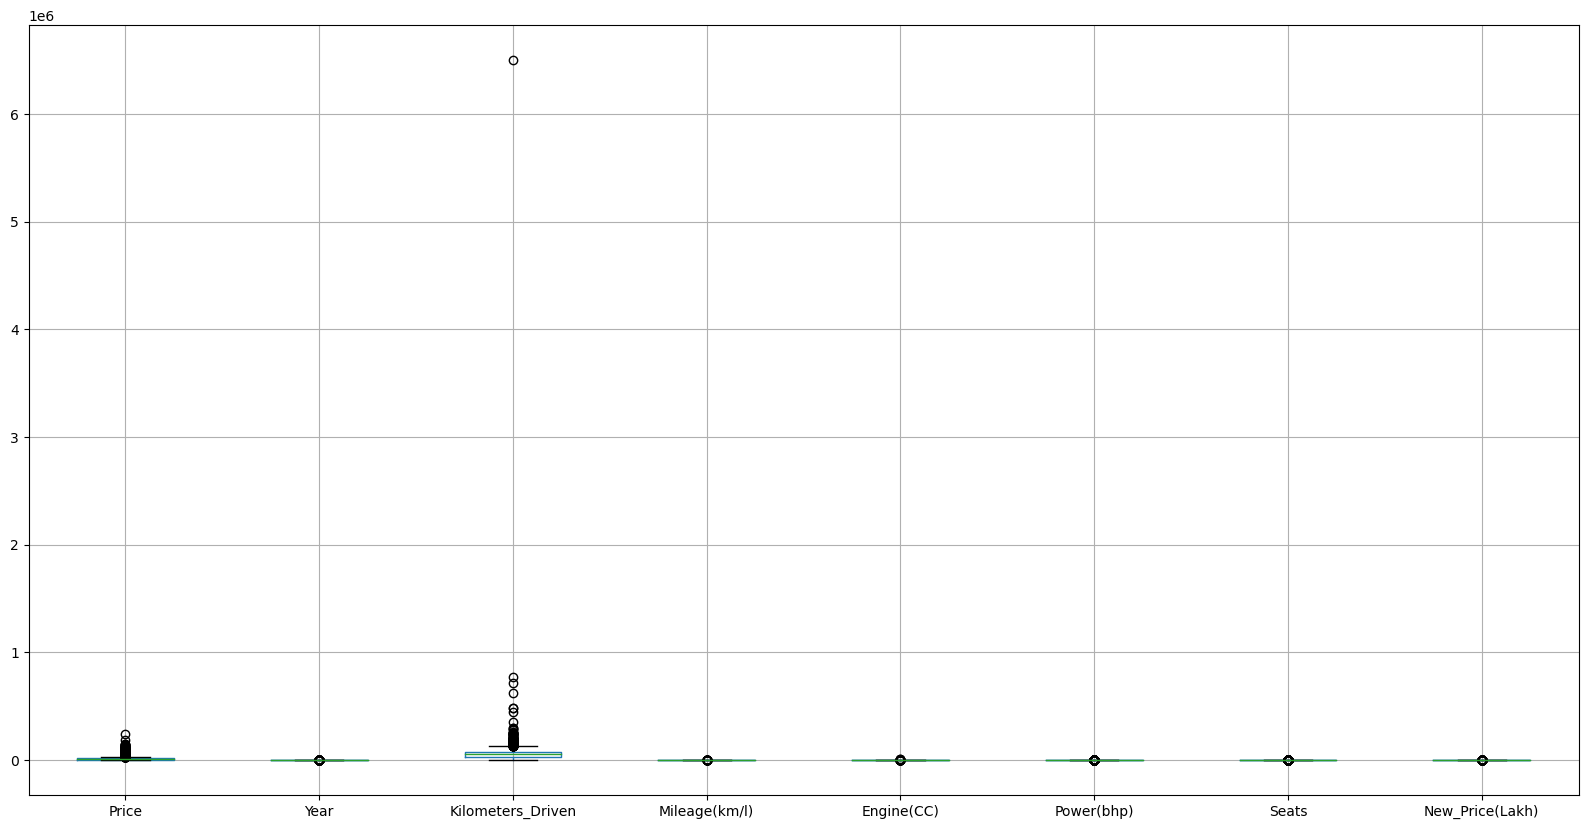

In [25]:
df.boxplot(figsize=(20,10))

{'whiskers': [<matplotlib.lines.Line2D at 0x7fe59b155570>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe59b155ab0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe59b1552d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fe59b155ff0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fe59b156290>],
 'means': []}

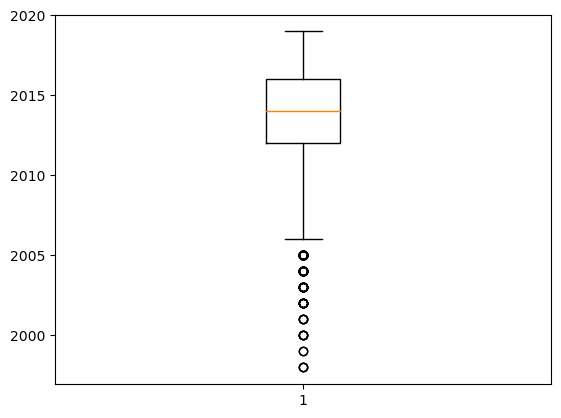

In [26]:
plt.boxplot(df['Year'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fe59b1a7a90>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe59b1a7eb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe59b1a77f0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fe59c00c430>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fe59c00c6d0>],
 'means': []}

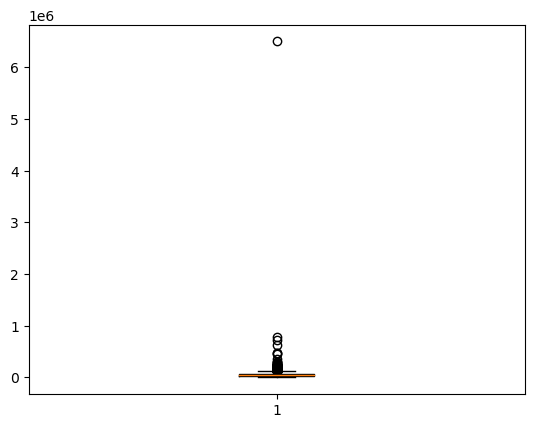

In [27]:
plt.boxplot(df['Kilometers_Driven'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fe59c056b00>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe59c057040>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe59c056860>],
 'medians': [<matplotlib.lines.Line2D at 0x7fe59c057580>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fe59c057820>],
 'means': []}

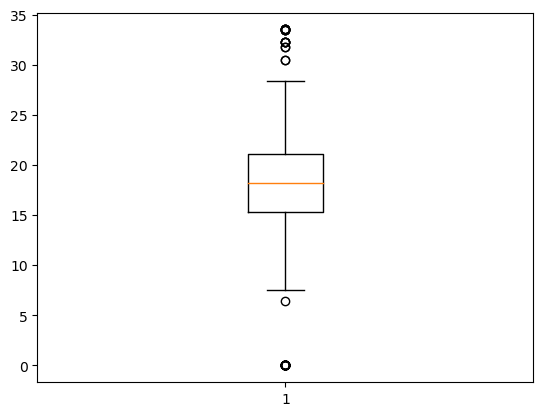

In [28]:
plt.boxplot(df['Mileage(km/l)'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fe59c0beaa0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe59c0befe0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe59c0be800>],
 'medians': [<matplotlib.lines.Line2D at 0x7fe59c0bf520>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fe59c0bf7c0>],
 'means': []}

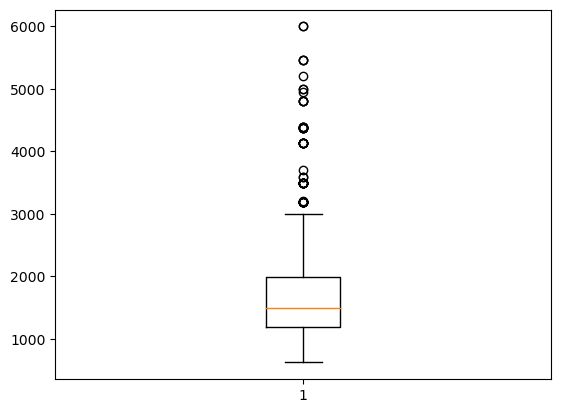

In [29]:
plt.boxplot(df['Engine(CC)'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fe59bf358a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe59bf35de0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe59bf355a0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fe59bf36320>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fe59bf365c0>],
 'means': []}

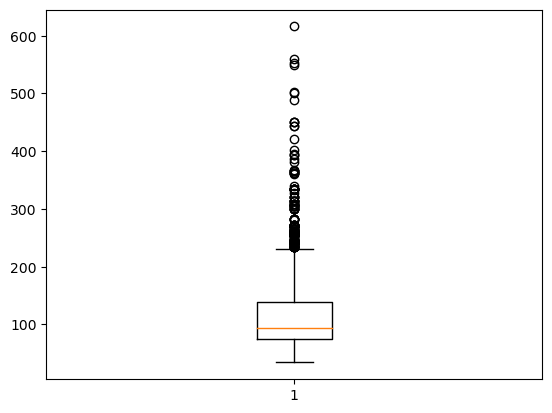

In [30]:
plt.boxplot(df['Power(bhp)'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fe59bfb8490>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe59bfb89d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe59bfb81f0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fe59bfb8f10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fe59bfb91b0>],
 'means': []}

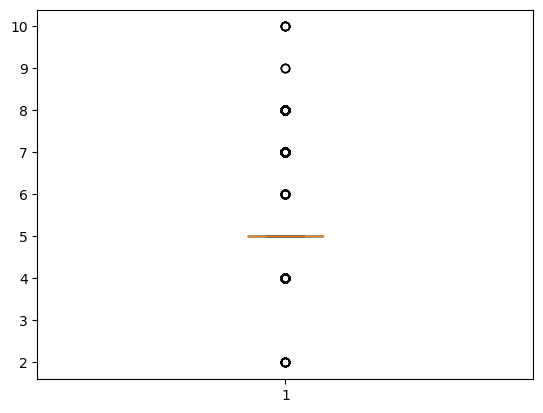

In [31]:
plt.boxplot(df['Seats'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fe5983cf160>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe5983cf6a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe5983ceec0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fe5983cfbe0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fe5983cfe80>],
 'means': []}

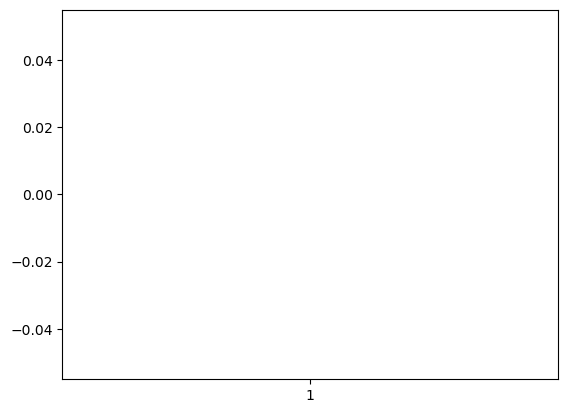

In [33]:
plt.boxplot(df['New_Price(Lakh)'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fe5984055d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe598405b10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe598405330>],
 'medians': [<matplotlib.lines.Line2D at 0x7fe598406050>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fe5984062f0>],
 'means': []}

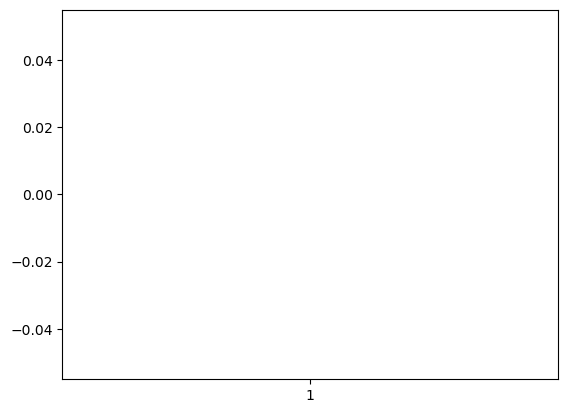

In [35]:
plt.boxplot(df['Price'])

In [37]:

df['Price'].isnull().sum()

1020

In [45]:
NPN = df[df['New_Price'].isnull() == True]['Name']
NP = df[df['New_Price'].isnull() == False]['Name']



In [46]:
overlap_cars = NPN[NPN.isin(NP)]

# 겹치는 자동차 이름을 새로운 시리즈에 담기
new_series = pd.Series(overlap_cars)

# 결과 출력
print(new_series)

3                     Maruti Ertiga VDI
51                     Maruti Swift LDI
53                     Maruti Swift VDI
80                     Maruti Swift VDI
151                    Maruti Swift VDI
                     ...               
7116                  BMW 3 Series 320d
7169                  Maruti Ertiga VDI
7191    Renault Duster 110PS Diesel RxZ
7249             Volkswagen Polo GT TSI
7251             Volkswagen Polo GT TSI
Name: Name, Length: 227, dtype: object


In [50]:
NP.value_counts()

Maruti Alto K10 VXI               20
Toyota Innova Crysta 2.8 ZX AT    15
BMW 5 Series 520d Luxury Line     14
BMW 3 Series 320d                 13
Maruti Wagon R VXI                13
                                  ..
Audi A4 30 TFSI Premium Plus       1
Ford Endeavour Titanium 4X2        1
Maruti Eeco CNG 5 Seater AC        1
Mahindra XUV500 W7                 1
Hyundai Elite i20 Magna Plus       1
Name: Name, Length: 370, dtype: int64

In [51]:
NPN.value_counts()

Mahindra XUV500 W8 2WD                        55
Maruti Swift Dzire VDI                        42
Maruti Swift VDI                              40
Honda City 1.5 S MT                           39
Maruti Swift VDI BSIV                         37
                                              ..
Hyundai Getz GLS ABS                           1
Ford Figo 2015-2019 1.2P Sports Edition MT     1
Audi Q5 2.0 TDI Technology                     1
Audi A6 2.8 FSI                                1
Skoda Superb Petrol Ambition                   1
Name: Name, Length: 1702, dtype: int64

In [52]:
df['Brand'] = df['Name'].str.split().str[0]
df

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Brand
0,Maruti Wagon R LXI CNG,Mumbai,2682.68,2010,72000,CNG,Manual,First,26.6 kmpl,998 CC,58.16 bhp,5.0,NaN,Maruti
1,Hyundai Creta 1.6 CRDi SX Option,Pune,19162.00,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,Hyundai
2,Honda Jazz V,Chennai,6898.32,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,Honda
3,Maruti Ertiga VDI,Chennai,9197.76,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,Maruti
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,27194.71,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,Audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,Volkswagen Vento Diesel Trendline,Hyderabad,NaN,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,Volkswagen
7249,Volkswagen Polo GT TSI,Mumbai,NaN,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN,Volkswagen
7250,Nissan Micra Diesel XV,Kolkata,NaN,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,Nissan
7251,Volkswagen Polo GT TSI,Pune,NaN,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN,Volkswagen


In [53]:
# 이거 히스토그램 그리기
df['Brand'].value_counts()

Maruti           1444
Hyundai          1340
Honda             743
Toyota            507
Mercedes-Benz     380
Volkswagen        374
Ford              351
Mahindra          331
BMW               312
Audi              285
Tata              228
Skoda             202
Renault           170
Chevrolet         151
Nissan            117
Land               67
Jaguar             48
Fiat               38
Mitsubishi         36
Mini               31
Volvo              28
Porsche            19
Jeep               19
Datsun             17
ISUZU               5
Force               3
Bentley             2
Smart               1
Ambassador          1
Lamborghini         1
Hindustan           1
OpelCorsa           1
Name: Brand, dtype: int64

In [56]:
df[df['Brand']=='Maruti']['Name'].value_counts()

Maruti Swift VDI                     49
Maruti Swift Dzire VDI               42
Maruti Swift VDI BSIV                37
Maruti Ritz VDi                      35
Maruti Alto LXi                      30
                                     ..
Maruti Swift AMT DDiS VDI             1
Maruti Celerio ZXI Optional           1
Maruti Wagon R VXi BSII               1
Maruti Swift 1.3 VXI ABS              1
Maruti Vitara Brezza ZDi Plus AMT     1
Name: Name, Length: 311, dtype: int64